**Importing libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

%autosave 1

ModuleNotFoundError: No module named 'plotly'

In [ ]:
!pip install jupyter_contrib_nbextensions

In [3]:
data_1 = pd.read_csv("data_1.csv")
data_2 = pd.read_csv("data_2.csv")
df = pd.concat([data_1, data_2])
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
89673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
89674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
89675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.

I have found that there is a missing row in the data 

to fix this row in the dataset

According to the author of this dataset, one particular incident is missing from the dataset

I have manually added this incident [read here](https://www.kaggle.com/jameslko/gun-violence-data/discussion/55307)

In [ ]:
missing_row = [
    'sban_1', '2017-10-01', 'Nevada', 'Las Vegas', 'Mandalay Bay 3950 Blvd S',
    59, 489, 'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting',
    'https://en.wikipedia.org/wiki/2017_Las_Vegas_shooting', '-', '-', '-',
    '-', '-', '36.095', 'Hotel', '-115.171667', 47,
    'Route 91 Harvest Festiva; concert, open fire from 32nd floor. 47 guns seized; TOTAL:59 kill, 489 inj, number shot TBD,girlfriend Marilou Danley POI',
    '-', '-', '-', '-', '-', '-', '-', '-', '-', '-'
]
df.loc[len(df)] = missing_row

In [21]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df['monthday'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['violence'] = df['n_killed'] + df['n_injured']

NameError: name 'calendar' is not defined

In [19]:
df

,incident_id,n_killed,n_injured,incident_url_fields_missing,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
incident_id,1.000000,0.005052,0.009060,NaN,-0.003585,0.019365,-0.017031,-0.029638,-0.002243,-0.007790
n_killed,0.005052,1.000000,-0.125425,NaN,0.055545,-0.080078,-0.062149,-0.028200,-0.006015,-0.010650
n_injured,0.009060,-0.125425,1.000000,NaN,-0.007636,-0.011379,0.036962,-0.038843,-0.030355,-0.044294
incident_url_fields_missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
congressional_district,-0.003585,0.055545,-0.007636,NaN,1.000000,-0.259488,-0.215606,0.021249,0.228827,0.309116
latitude,0.019365,-0.080078,-0.011379,NaN,-0.259488,1.000000,-0.056713,-0.001341,-0.237958,0.028611
longitude,-0.017031,-0.062149,0.036962,NaN,-0.215606,-0.056713,1.000000,-0.016107,0.236450,0.113408
n_guns_involved,-0.029638,-0.028200,-0.038843,NaN,0.021249,-0.001341,-0.016107,1.000000,-0.003324,0.004247
state_house_district,-0.002243,-0.006015,-0.030355,NaN,0.228827,-0.237958,0.236450,-0.003324,1.000000,0.431299
state_senate_district,-0.007790,-0.010650,-0.044294,NaN,0.309116,0.028611,0.113408,0.004247,0.431299,1.000000


In [ ]:
df.columns

**Number of gun violence per year**

In [20]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values


x1, y1 = create_stack_bar_data('year')
x1 = x1[:-1]
y1 = y1[:-1]

sns.barplot(x=x1, y=y1, data=df);

KeyError: 'year'

### **Incidents per month**

**Incidents per month for every year**

In [ ]:
yearly = df.groupby(['year', 'month']).aggregate({
    'month': 'count',
}).rename(columns={
    'month': 'month_count'
}).reset_index()

year_2013 = yearly[yearly['year'] == 2013]
year_2014 = yearly[yearly['year'] == 2014]
year_2015 = yearly[yearly['year'] == 2015]
year_2016 = yearly[yearly['year'] == 2016]
year_2017 = yearly[yearly['year'] == 2017]
year_2018 = yearly[yearly['year'] == 2018]

year_2013 = year_2013[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2013.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2013['month_count'], 2),
             color='month_count',
             title='year 2013')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2014 = year_2014[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2014.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2014['month_count'], 2),
             color='month_count',
             title='year 2014')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2015 = year_2015[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2015.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2015['month_count'], 2),
             color='month_count',
             title='year 2015')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2016 = year_2016[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2016.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2016['month_count'], 2),
             color='month_count',
             title='year 2016')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2017 = year_2017[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2017.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2017['month_count'], 2),
             color='month_count',
             title='year 2017')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

year_2018 = year_2018[['month', 'month_count'
                       ]].set_index('month').sort_values('month_count')
fig = px.bar(year_2018.reset_index(),
             y='month',
             x='month_count',
             text=round(year_2018['month_count'], 2),
             color='month_count',
             title='year 2018')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Average Incisents per year**

In [ ]:
pivote_year = pd.pivot_table(
    yearly, index='month', values='month_count',
    aggfunc='mean').sort_values('month_count').reset_index()

fig = px.bar(pivote_year,
             y='month',
             x='month_count',
             text=round(pivote_year['month_count'], 2),
             color='month_count',
             title='Average incidents per year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Average number of gun violence per week**

In [ ]:
tempdf1 = df.groupby(['year', 'weekday']).agg({
    'weekday': 'count'
}).rename(columns={
    'weekday': 'weekday_count'
}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count': 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

wkmp = {}
for j, x in enumerate(x2):
    wkmp[x] = y2[j]

sns.barplot(x=x2, y=y2, data=df);

**number of incidents by every state**

In [ ]:
states_df = df['state'].value_counts()
statesdf = pd.DataFrame()
statesdf['state'] = states_df.index
statesdf['counts'] = states_df.values
num_incidents_evey_state = pd.DataFrame(data=statesdf['counts'])
num_incidents_evey_state.set_index(statesdf['state'], inplace=True)
plt.figure(figsize=(15, 12))
sns.barplot(x=statesdf['counts'], y=statesdf['state']);

**Incident happend vs violence level**

In [22]:
statdf = df.reset_index().groupby(by=['state']).agg({
    'violence': 'sum',
    'year': 'count'
}).rename(columns={'year': 'count'})
statdf['state'] = statdf.index
statdf.sort_values('count', ascending=False, inplace=True)
statdf.plot(kind='bar', figsize=(20, 10));

KeyError: "Column(s) ['violence'] do not exist"

**Incidents per 100k by state**

In [ ]:
census_2013 = {
    'Mississippi': 2991207,
    'Iowa': 3090416,
    'Oklahoma': 3850568,
    'Delaware': 925749,
    'Minnesota': 5420380,
    'Alaska': 735132,
    'Illinois': 12882135,
    'Arkansas': 2959373,
    'New Mexico': 2085287,
    'Indiana': 6570902,
    'Maryland': 5928814,
    'Louisiana': 4625470,
    'Texas': 26448193,
    'Wyoming': 582658,
    'Arizona': 6626624,
    'Wisconsin': 5742713,
    'Michigan': 9895622,
    'Kansas': 2893957,
    'Utah': 2900872,
    'Virginia': 8260405,
    'Oregon': 3930065,
    'Connecticut': 3596080,
    'New York': 19651127,
    'California': 38332521,
    'Massachusetts': 6692824,
    'West Virginia': 1854304,
    'South Carolina': 4774839,
    'New Hampshire': 1323459,
    'Vermont': 626630,
    'Georgia': 9992167,
    'North Dakota': 723393,
    'Pennsylvania': 12773801,
    'Florida': 19552860,
    'Hawaii': 1404054,
    'Kentucky': 4395295,
    'Rhode Island': 1051511,
    'Nebraska': 1868516,
    'Missouri': 6044171,
    'Ohio': 11570808,
    'Alabama': 4833722,
    'South Dakota': 844877,
    'Colorado': 5268367,
    'Idaho': 1612136,
    'New Jersey': 8899339,
    'Washington': 6971406,
    'North Carolina': 9848060,
    'Tennessee': 6495978,
    'Montana': 1015165,
    'District of Columbia': 646449,
    'Nevada': 2790136,
    'Maine': 1328302
}
statesdf['population'] = statesdf['state'].apply(lambda x: census_2013[x])
statesdf['incidents_per_k'] = statesdf.apply(
    lambda x: float(x['counts']) * 100000 / x['population'], axis=1)
tempdf = statesdf.sort_values('incidents_per_k', ascending=False)
tempdf.set_index('state', inplace=True)
tempdf.sort_values('incidents_per_k', ascending=False, inplace=True)
tempdf['incidents_per_k'].plot(kind='bar', figsize=(20, 10), color='red');

**Common Areas of Gun Violence Incidents**

In [ ]:
txt = " ".join(df['location_description'].dropna())
wc = WordCloud(max_font_size=50,
               max_words=1000,
               stopwords=STOPWORDS,
               background_color='White').generate(txt)
plt.figure(figsize=(10, 20))
plt.imshow(wc)
plt.axis('off');

**Contributor: Ibukun Ekunwe**

**Task: Number of guns used in incidents**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
my_df = df[['n_guns_involved', 'year', 'state']].dropna()

Y2013 = my_df[my_df['year']==2013].drop(columns='year')
Y2013=Y2013.groupby('state')['n_guns_involved'].max()
Y2013.sort_values(inplace=True)

Y2014 = my_df[my_df['year']==2014].drop(columns='year')
Y2014=Y2014.groupby('state')['n_guns_involved'].max()
Y2014.sort_values(inplace=True)

Y2015 = my_df[my_df['year']==2015].drop(columns='year')
Y2015=Y2015.groupby('state')['n_guns_involved'].max()
Y2015.sort_values(inplace=True)

Y2016 = my_df[my_df['year']==2016].drop(columns='year')
Y2016=Y2016.groupby('state')['n_guns_involved'].max()
Y2016.sort_values(inplace=True)

Y2017 = my_df[my_df['year']==2017].drop(columns='year')
Y2017=Y2017.groupby('state')['n_guns_involved'].max()
Y2017.sort_values(inplace=True)

Y2018 = my_df[my_df['year']==2018].drop(columns='year')
Y2018=Y2018.groupby('state')['n_guns_involved'].max()
Y2018.sort_values(inplace=True)

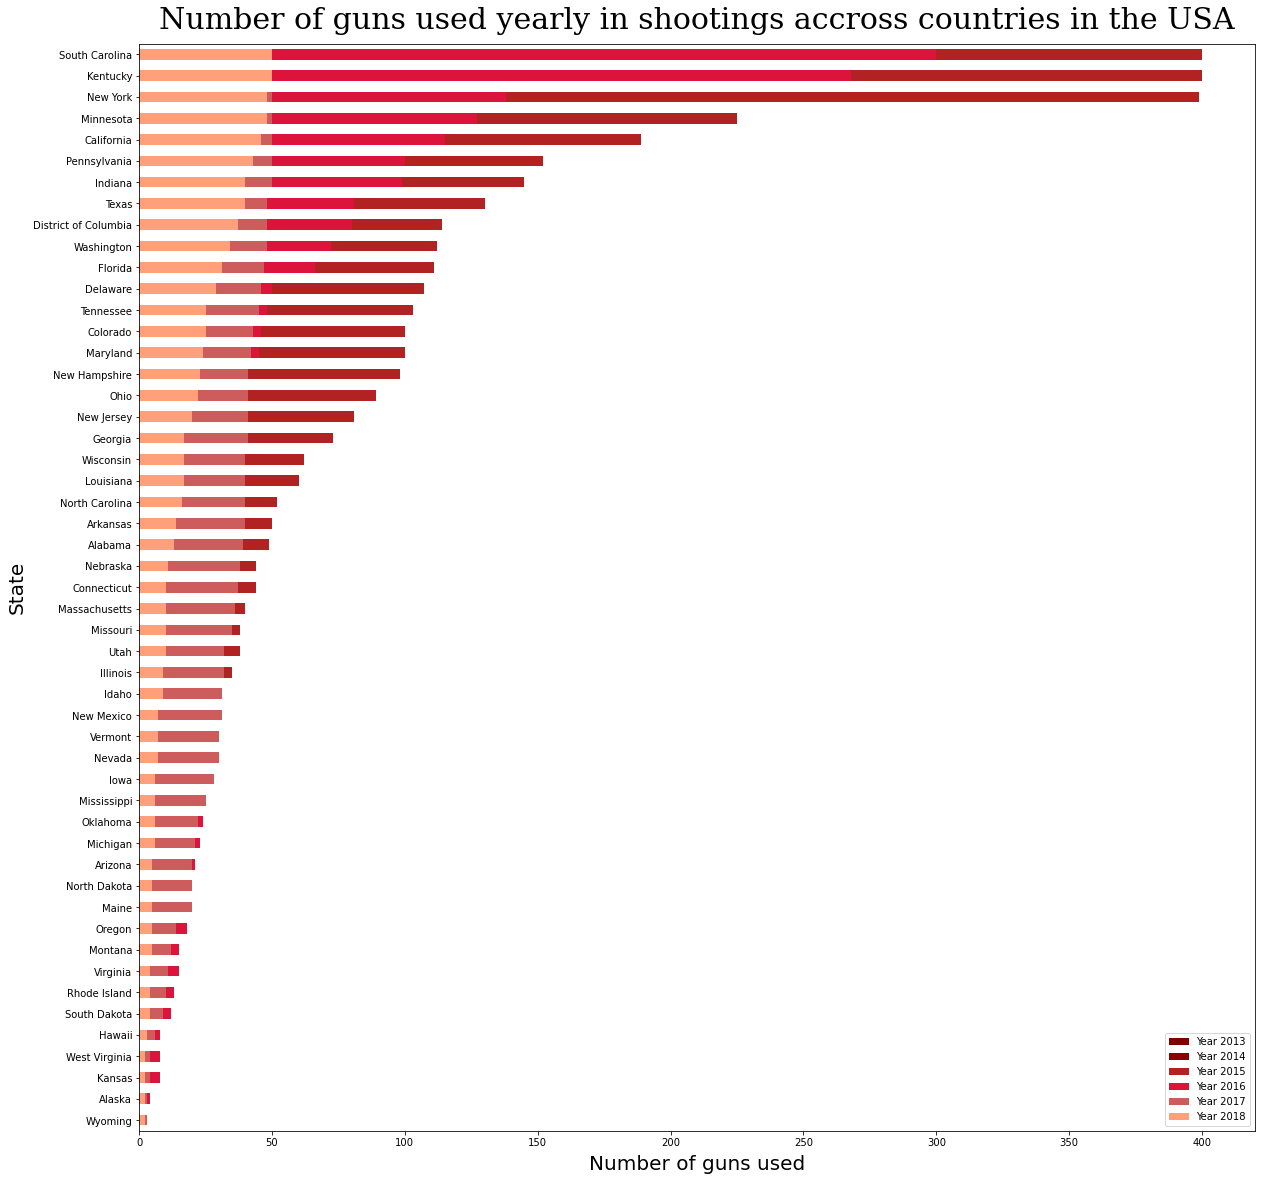

In [82]:
Y2018.plot(kind='barh',figsize=(20,20),color='#800000',legend=True, label='Year 2013');
Y2017.plot(kind='barh',figsize=(20,20),color='#8B0000',legend=True, label='Year 2014');
Y2017.plot(kind='barh',figsize=(20,20),color='#B22222',legend=True, label='Year 2015');
Y2017.plot(kind='barh',figsize=(20,20),color='#DC143C',legend=True, label='Year 2016');
Y2017.plot(kind='barh',figsize=(20,20),color='#CD5C5C',legend=True, label='Year 2017');
Y2017.plot(kind='barh',figsize=(20,20),color='#FFA07A',legend=True, label='Year 2018');





plt.xlabel('Number of guns used', labelpad=7, loc='center', fontsize=20)
plt.ylabel('State', labelpad=7, fontsize=20)
plt.title('Number of guns used yearly in shootings accross countries in the USA',pad=15, fontsize=30, fontfamily='Serif');

In [76]:
help(plt.xlabel)

Help on function xlabel in module matplotlib.pyplot:

xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    Set the label for the x-axis.
    
    Parameters
    ----------
    xlabel : str
        The label text.
    
    labelpad : float, default: :rc:`axes.labelpad`
        Spacing in points from the axes bounding box including ticks
        and tick labels.  If None, the previous value is left as is.
    
    loc : {'left', 'center', 'right'}, default: :rc:`xaxis.labellocation`
        The label position. This is a high-level alternative for passing
        parameters *x* and *horizontalalignment*.
    
    Other Parameters
    ----------------
    **kwargs : `.Text` properties
        `.Text` properties control the appearance of the label.
    
    See Also
    --------
    text : Documents the properties supported by `.Text`.



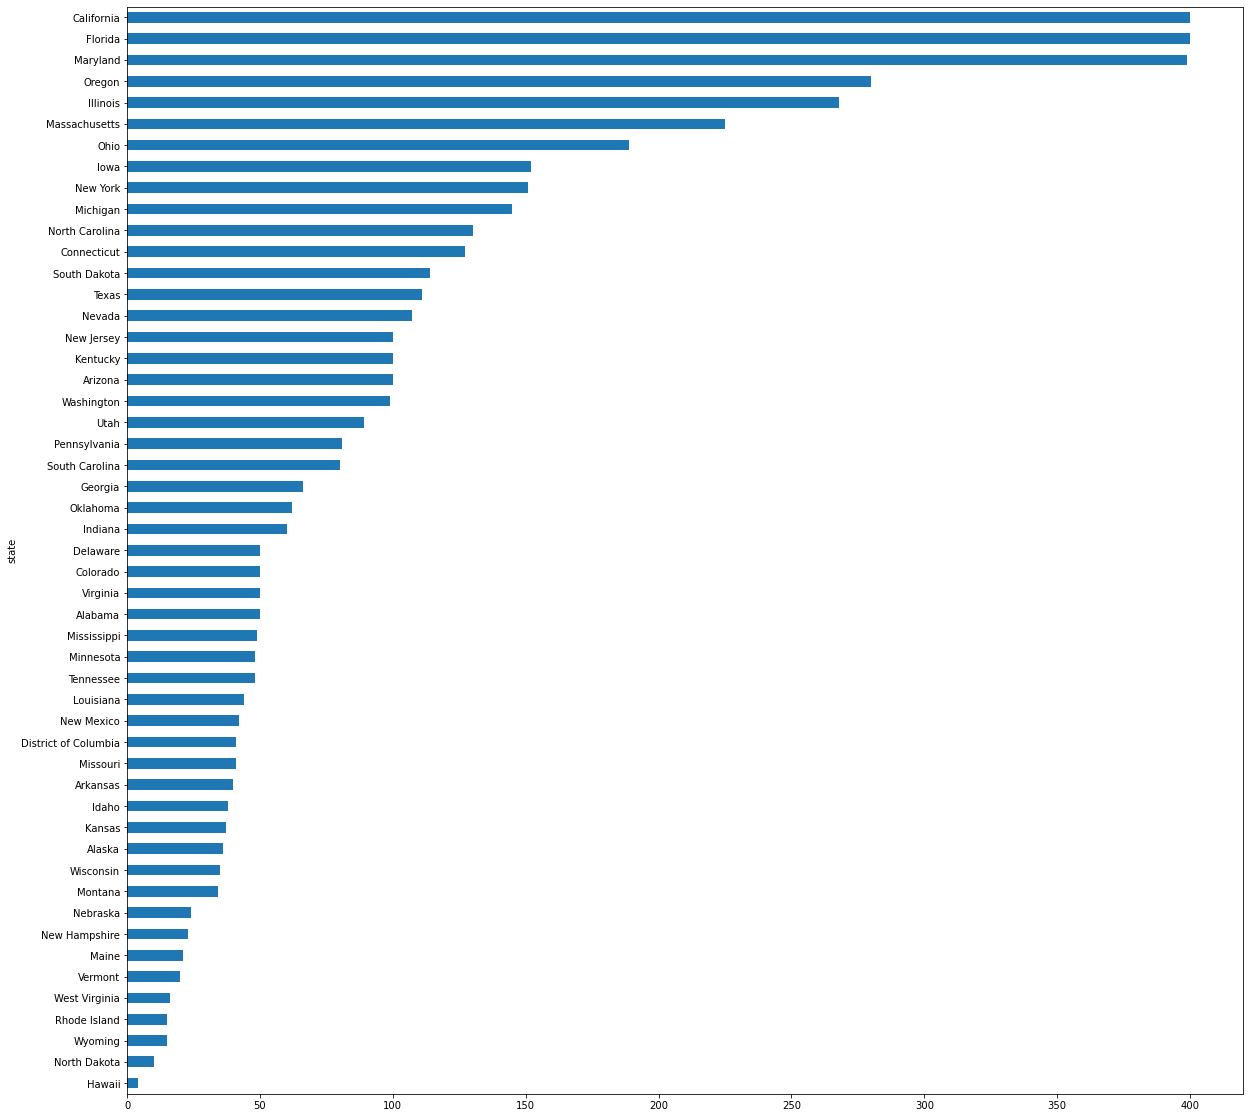

In [74]:
Yearwise=pd.concat([Y2013,Y2014,Y2015,Y2016,Y2017,Y2018])
Yearwise=Yearwise.groupby('state').max()
Yearwise.sort_values(inplace=True)

Yearwise.plot(kind='barh',figsize=(20,20));
